In [46]:
# Imports
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from collections import defaultdict

### Dataset Preprocessing

In [2]:
dataset = load_dataset("surrey-nlp/PLOD-CW-25")

In [47]:
labels = ["O", "B-AC", "B-LF", "I-LF"]
n_labels = len(labels)
ltoi = {l: i for i, l in enumerate(labels)}
itol = {i: l for l, i in ltoi.items()}

df = pd.DataFrame(dataset['train'])
colors = lambda x: plt.cm.plasma(np.linspace(0, 1, x))

In [48]:
print("Number of Training Samples: ", dataset["train"].num_rows)
print("Number of Test Samples: ", dataset["test"].num_rows)
print("Number of Validation Samples: ", dataset["validation"].num_rows)

Number of Training Samples:  1072
Number of Test Samples:  153
Number of Validation Samples:  126


### POS Tag Distribution

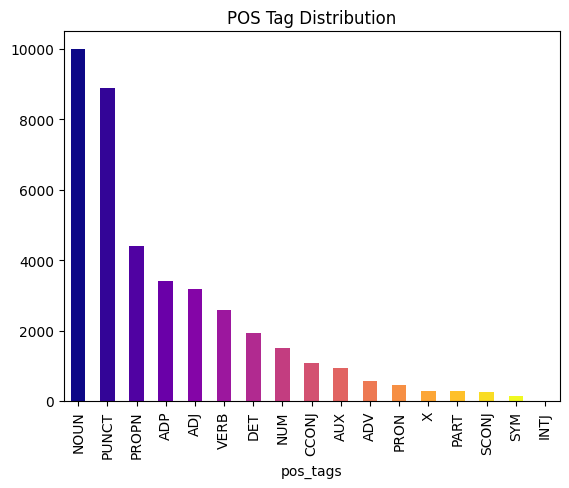

In [49]:
df['pos_tags'].explode().value_counts().plot(kind='bar', color=colors(16), title='POS Tag Distribution')
plt.show()

### NER Tag Distribution

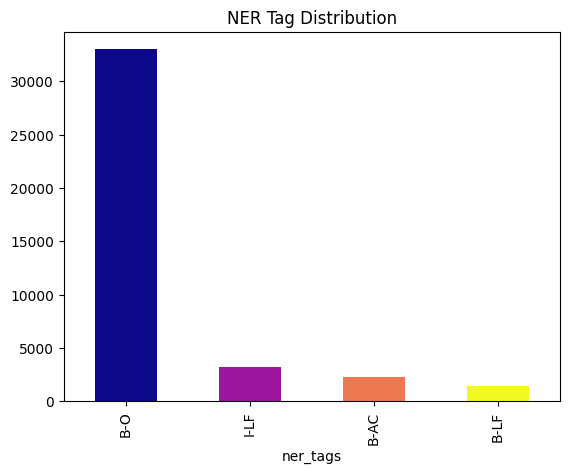

In [50]:
#NER Tag distribution
df['ner_tags'].explode().value_counts().plot(kind='bar', color=colors(4), title='NER Tag Distribution')
plt.show()

### Token Length per Sequence

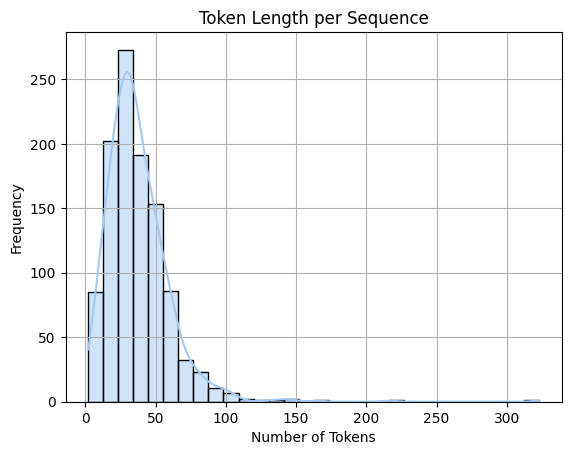

In [56]:
# Compute token lengths
token_lengths = [len(sample['tokens']) for sample in dataset['train']]

sns.histplot(token_lengths, kde=True, bins=30)
plt.title("Token Length per Sequence")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Top 10 most occuring Abbreviations and Long Forms in dataset

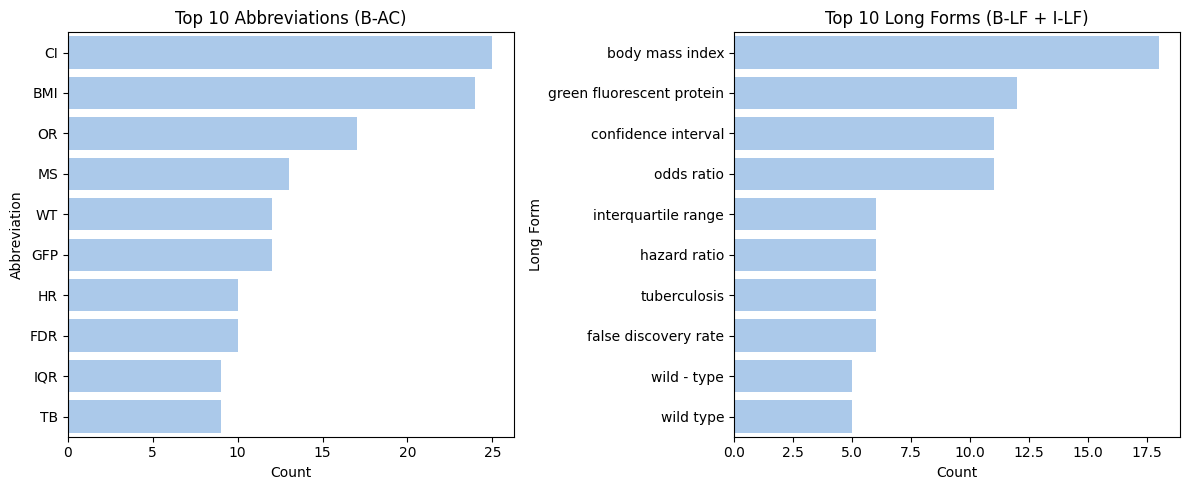

In [51]:
tag_map = labels
abbrevs = []
long_forms = []

# Parse tokens by tags
for sample in dataset['train']:
    tokens = sample['tokens']
    tags = sample['ner_tags']
    i = 0
    while i < len(tags):
        if tags[i] == 'B-AC':
            abbrevs.append(tokens[i])
        elif tags[i] == 'B-LF':
            lf = [tokens[i]]
            i += 1
            while i < len(tags) and tags[i] == 'I-LF':
                lf.append(tokens[i])
                i += 1
            long_forms.append(" ".join(lf))
            continue
        i += 1

# Plot top 10
from collections import Counter
top_ac = Counter(abbrevs).most_common(10)
top_lf = Counter(long_forms).most_common(10)

ac_tokens, ac_counts = zip(*top_ac)
lf_tokens, lf_counts = zip(*top_lf)
sns.set_palette("pastel") 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(ac_counts), y=list(ac_tokens))
plt.title("Top 10 Abbreviations (B-AC)")
plt.xlabel("Count")
plt.ylabel("Abbreviation")

plt.subplot(1, 2, 2)
sns.barplot(x=list(lf_counts), y=list(lf_tokens))
plt.title("Top 10 Long Forms (B-LF + I-LF)")
plt.xlabel("Count")
plt.ylabel("Long Form")

plt.tight_layout()
plt.show()